# MOVIE RECOMMENDER ENGINE - 3
Data - Amazaon Movies and TV

## LSTM - Content-Based Filtering
LSTM powered Content-Based Filtering Approach to Recommendations

In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM

In [6]:
df = pd.read_csv("/Users/siddharthmandgi/Desktop/2020-Summer-Honors-Home/Datasets/Amazon_Movies.csv")
df = df.drop("Unnamed: 0", axis=1)
df = df.rename(columns = {"asin" : "Movie_ID", "overall" : "ratings" })
df['ratings'] = df['ratings'].astype(int)
ratings = df['ratings'].unique().tolist()
df

,reviewerID,Movie_ID,reviewerName,helpful,reviewText,ratings,summary,unixReviewTime,reviewTime
0,ADZPIG9QOCDG5,0005019281,"Alice L. Larson ""alice-loves-books""","[0, 0]",This is a charming version of the classic Dick...,4,good version of a classic,1203984000,"02 26, 2008"
1,A35947ZP82G7JH,0005019281,Amarah Strack,"[0, 0]",It was good but not as emotionally moving as t...,3,Good but not as moving,1388361600,"12 30, 2013"
2,A3UORV8A9D5L2E,0005019281,Amazon Customer,"[0, 0]","Don't get me wrong, Winkler is a wonderful cha...",3,Winkler's Performance was ok at best!,1388361600,"12 30, 2013"
3,A1VKW06X1O2X7V,0005019281,"Amazon Customer ""Softmill""","[0, 0]",Henry Winkler is very good in this twist on th...,5,It's an enjoyable twist on the classic story,1202860800,"02 13, 2008"
4,A3R27T4HADWFFJ,0005019281,BABE,"[0, 0]",This is one of the best Scrooge movies out. H...,4,Best Scrooge yet,1387670400,"12 22, 2013"
...,...,...,...,...,...,...,...,...,...
1697528,AV657BUYHHXZ2,B00LT1JHLW,"Mike Rules ""Mike""","[1, 14]",wow $269.99 for the entire series on Blu Ray??...,1,Way to Expensive!! WB = GREED,1406073600,"07 23, 2014"
1697529,A17W587EH23J0Q,B00LT1JHLW,"Ron2900 ""Ron""","[32, 48]","Finally, the holy grail of tv-on-dvd boxsets i...",5,"HOLY BAT-BOXSET, BATMAN... I never thought thi...",1405641600,"07 18, 2014"
1697530,A3DE438TF1A958,B00LT1JHLW,thomas henry,"[3, 10]",Could this be a true or I'm i dreaming batman ...,5,prayers have been answered because batman 60s ...,1405728000,"07 19, 2014"
1697531,A2RWCXDMANY0LW,B00LT1JHLW,wheev,"[0, 4]",I've been a fan of the series since I was a yo...,5,can't Wait!,1405987200,"07 22, 2014"


In [7]:
def partition(x):
    if x<3:
        return 'Negative'
    elif x>3:
        return 'Positive'
    return 'Neutral'

actualScore = df['ratings']
positiveNegative = actualScore.map(partition)
df['sentiment'] = positiveNegative
df = df[['reviewerID', 'Movie_ID', 'reviewerName', 'helpful', 'unixReviewTime', 'reviewTime', 'reviewText', 'summary', 'ratings', 'sentiment']]
df

,reviewerID,Movie_ID,reviewerName,helpful,unixReviewTime,reviewTime,reviewText,summary,ratings,sentiment
0,ADZPIG9QOCDG5,0005019281,"Alice L. Larson ""alice-loves-books""","[0, 0]",1203984000,"02 26, 2008",This is a charming version of the classic Dick...,good version of a classic,4,Positive
1,A35947ZP82G7JH,0005019281,Amarah Strack,"[0, 0]",1388361600,"12 30, 2013",It was good but not as emotionally moving as t...,Good but not as moving,3,Neutral
2,A3UORV8A9D5L2E,0005019281,Amazon Customer,"[0, 0]",1388361600,"12 30, 2013","Don't get me wrong, Winkler is a wonderful cha...",Winkler's Performance was ok at best!,3,Neutral
3,A1VKW06X1O2X7V,0005019281,"Amazon Customer ""Softmill""","[0, 0]",1202860800,"02 13, 2008",Henry Winkler is very good in this twist on th...,It's an enjoyable twist on the classic story,5,Positive
4,A3R27T4HADWFFJ,0005019281,BABE,"[0, 0]",1387670400,"12 22, 2013",This is one of the best Scrooge movies out. H...,Best Scrooge yet,4,Positive
...,...,...,...,...,...,...,...,...,...,...
1697528,AV657BUYHHXZ2,B00LT1JHLW,"Mike Rules ""Mike""","[1, 14]",1406073600,"07 23, 2014",wow $269.99 for the entire series on Blu Ray??...,Way to Expensive!! WB = GREED,1,Negative
1697529,A17W587EH23J0Q,B00LT1JHLW,"Ron2900 ""Ron""","[32, 48]",1405641600,"07 18, 2014","Finally, the holy grail of tv-on-dvd boxsets i...","HOLY BAT-BOXSET, BATMAN... I never thought thi...",5,Positive
1697530,A3DE438TF1A958,B00LT1JHLW,thomas henry,"[3, 10]",1405728000,"07 19, 2014",Could this be a true or I'm i dreaming batman ...,prayers have been answered because batman 60s ...,5,Positive
1697531,A2RWCXDMANY0LW,B00LT1JHLW,wheev,"[0, 4]",1405987200,"07 22, 2014",I've been a fan of the series since I was a yo...,can't Wait!,5,Positive


In [8]:
from string import punctuation
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [66]:
reviews_split = []
for reviews in df['reviewText'].head(10000):
    reviews = str(reviews).lower()
    all_text = ''.join([c for c in reviews if c not in punctuation])
    reviews_split.append(all_text)

In [67]:
reviews_split[0]

'this is a charming version of the classic dickens tale  henry winkler makes a good showing as the scrooge character  even though you know what will happen this version has enough of a change to make it better that average  if you love a christmas carol in any version then you will love this'

In [68]:
from collections import Counter
all_text2 = ' '.join(reviews_split)
# create a list of words
words = all_text2.split()
# Count all the words using Counter Method
count_words = Counter(words)
total_words = len(words)
sorted_words = count_words.most_common(total_words)

In [69]:
vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}

In [70]:
reviews_int = []
for review in reviews_split:
    r = [vocab_to_int[w] for w in review.split()]
    reviews_int.append(r)
print (reviews_int[0:3])

[[8, 6, 4, 1365, 101, 3, 1, 188, 3427, 670, 1463, 2176, 150, 4, 47, 671, 12, 1, 2892, 134, 70, 151, 20, 122, 46, 54, 820, 8, 101, 37, 214, 3, 4, 754, 5, 109, 9, 127, 11, 1396, 42, 20, 73, 4, 273, 2720, 7, 106, 101, 102, 20, 54, 73, 8], [9, 16, 47, 17, 21, 12, 1707, 536, 12, 1, 1, 273, 2720, 28, 3427, 10, 38, 273, 87, 11, 109, 67, 6206], [96, 84, 67, 497, 2176, 6, 4, 217, 134, 318, 2, 10, 56, 986, 7425, 3, 22, 317, 12, 1525, 40, 4, 195, 26, 16, 21, 44, 1409, 7, 1, 1257, 231, 3, 16313, 302, 273, 10239, 543, 209, 9, 4, 2498, 40, 2498, 33, 85, 26888]]


In [71]:
labels_split = df['sentiment']

In [72]:
encoded_labels = [1 if label =='Positive' else 0 for label in labels_split]
encoded_labels = np.array(encoded_labels)
encoded_labels

array([1, 0, 0, ..., 1, 1, 1])

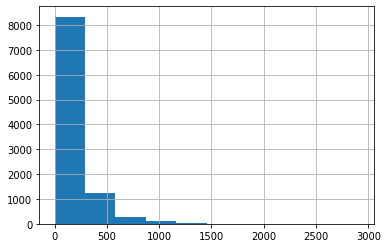

count    10000.000000
mean       163.236400
std        191.001397
min          0.000000
25%         39.000000
50%         95.000000
75%        212.000000
max       2910.000000
dtype: float64

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
reviews_len = [len(x) for x in reviews_int]
pd.Series(reviews_len).hist()
plt.show()
pd.Series(reviews_len).describe()

In [74]:
reviews_int = [ reviews_int[i] for i, l in enumerate(reviews_len) if l>0 ]
encoded_labels = [ encoded_labels[i] for i, l in enumerate(reviews_len) if l> 0 ]

In [75]:
len(encoded_labels)

9999

In [76]:
len(reviews_int)

9999

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(reviews_int, encoded_labels,test_size=0.2, random_state=42)

In [79]:
#Return features of review_ints, where each review is padded with 0's or truncated to the input seq_length
def pad_features(reviews_int, seq_length):
    features = np.zeros((len(reviews_int), seq_length), dtype = int)
    
    for i, review in enumerate(reviews_int):
        review_len = len(review)
        
        if review_len <= seq_length:
            zeroes = list(np.zeros(seq_length-review_len))
            new = zeroes+review
        elif review_len > seq_length:
            new = review[0:seq_length]
        
        features[i,:] = np.array(new)
    
    return features

In [80]:
np.save('X_train',X_train)

In [81]:
X_train = pad_features(X_train,80)
X_test = pad_features(X_test,80)

In [82]:
len(X_train)

7999

In [83]:
model = Sequential()
model.add(Embedding(100000,128))
model.add(LSTM(128, dropout = 0.2, recurrent_dropout = 0.2))
model.add(Dense(1, activation = 'sigmoid'))

In [84]:
model.compile(loss ='binary_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [85]:
model.fit(np.array(X_train),np.array(y_train),
         batch_size = 32,
         epochs = 5,
         verbose = 2,
         validation_data =(np.array(X_test), np.array(y_test)))

Epoch 1/5
250/250 - 55s - loss: 0.4409 - accuracy: 0.8237 - val_loss: 0.4786 - val_accuracy: 0.8155
Epoch 2/5
250/250 - 62s - loss: 0.2670 - accuracy: 0.8906 - val_loss: 0.4805 - val_accuracy: 0.8315
Epoch 3/5
250/250 - 63s - loss: 0.1195 - accuracy: 0.9565 - val_loss: 0.6178 - val_accuracy: 0.8190
Epoch 4/5
250/250 - 69s - loss: 0.0512 - accuracy: 0.9844 - val_loss: 0.6634 - val_accuracy: 0.7695
Epoch 5/5
250/250 - 75s - loss: 0.0216 - accuracy: 0.9929 - val_loss: 0.9340 - val_accuracy: 0.7995
